In [1]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Question 0

In [4]:
def lincoef(X,Y):
    if len(X) != len(Y):
        print ('Please Enter X and Y again')
    
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    sum = 0
    for i in range(len(X)):
        sum += ((X[i]-X_mean)* (Y[i]-Y_mean))
    
    cov = sum/(len(X)) 
    cor = cov/ (np.std(X) * np.std(Y))
    beta1 = cor * np.std(Y) / np.std(X)
    beta0 = Y_mean - X_mean * beta1
    
    return beta0, beta1

In [6]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Y = [1, 2, 3, 1, 2, 3, 1, 2, 3]
beta0, beta1 = lincoef(X,Y)
print(beta0)
print(beta1)

1.5
0.09999999999999999


In [14]:
print(st.linregress(x=X, y=Y))
print('beta0 from prewritten functions is ',st.linregress(x=X, y=Y)[1])
print('beta1 from prewritten functions is ',st.linregress(x=X, y=Y)[0])

LinregressResult(slope=0.1, intercept=1.5, rvalue=0.31622776601683794, pvalue=0.4070838220655887, stderr=0.11338934190276817)
beta0 from prewritten functions is  1.5
beta1 from prewritten functions is  0.1


# Question 1

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv')
df= df.drop(['Unnamed: 0'],axis =1)
df.head()

,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
4,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519


In [16]:
df1 = df.loc[df['roi'].isin(['Telencephalon_L', 'Telencephalon_R'])]
df1.head()

,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
836,kirby142a_3_1_ax.img,Telencephalon_L,545603,1.0,378.0,148.7835,56.9909,1,1,142,1404611,1297277
837,kirby142a_3_1_ax.img,Telencephalon_R,552216,0.0,376.0,156.1920,58.5402,1,1,142,1404611,1297277
1672,kirby239a_3_1_ax.img,Telencephalon_L,483107,0.0,507.0,145.7248,57.8707,1,1,239,1223704,1129450


In [17]:
df_tl = df.loc[df['roi']=='Telencephalon_L'].reset_index(drop=True)
df_tl.head()

,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,kirby142a_3_1_ax.img,Telencephalon_L,545603,1.0,378.0,148.7835,56.9909,1,1,142,1404611,1297277
2,kirby239a_3_1_ax.img,Telencephalon_L,483107,0.0,507.0,145.7248,57.8707,1,1,239,1223704,1129450
3,kirby346a_3_1_ax.img,Telencephalon_L,558849,2.0,390.0,158.8349,60.3935,1,1,346,1361902,1294746
4,kirby422a_3_1_ax.img,Telencephalon_L,509945,0.0,407.0,145.6388,53.1165,1,1,422,1335701,1225587


In [18]:
df_tr = df.loc[df['roi']=='Telencephalon_R'].reset_index(drop=True)
df_tr.head()

,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
1,kirby142a_3_1_ax.img,Telencephalon_R,552216,0.0,376.0,156.1920,58.5402,1,1,142,1404611,1297277
2,kirby239a_3_1_ax.img,Telencephalon_R,490805,0.0,371.0,153.9713,59.8162,1,1,239,1223704,1129450
3,kirby346a_3_1_ax.img,Telencephalon_R,568830,1.0,422.0,163.1182,61.0589,1,1,346,1361902,1294746
4,kirby422a_3_1_ax.img,Telencephalon_R,518902,1.0,355.0,149.1124,55.2450,1,1,422,1335701,1225587


[-13875.944799423742, 1.044241539832241]


Text(0, 0.5, 'Right Telencephalon Volume')

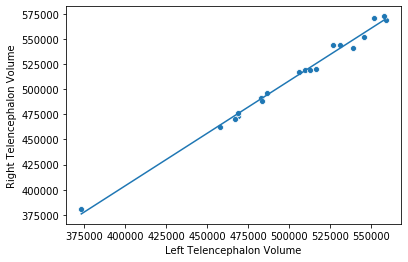

In [19]:
# Left Telencephalon Volume: Predictor, Right Telencephalon Volume: Outcome
x = df_tl['volume']
y = df_tr['volume']
beta1 = st.pearsonr(x, y)[0] * np.std(y) / np.std(x)
beta0 = np.mean(y) - np.mean(x) * beta1
print([beta0, beta1])

sns.scatterplot(x, y)
sns.lineplot(x, beta0 + beta1 * x)
plt.xlabel('Left Telencephalon Volume')
plt.ylabel('Right Telencephalon Volume')

[17150.431045804115, 0.9500552111008128]


Text(0, 0.5, 'Left Telencephalon Volume')

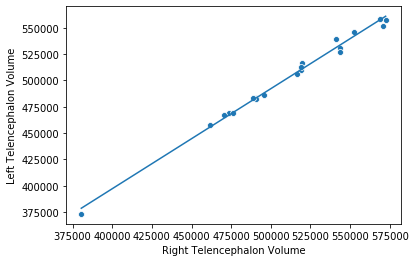

In [20]:
# Reverse Predictor and Response Relationship
x = df_tr['volume']
y = df_tl['volume']
beta1 = st.pearsonr(x, y)[0] * np.std(y) / np.std(x)
beta0 = np.mean(y) - np.mean(x) * beta1
print([beta0, beta1])

sns.scatterplot(x, y)
sns.lineplot(x, beta0 + beta1 * x)
plt.xlabel('Right Telencephalon Volume')
plt.ylabel('Left Telencephalon Volume')

# Question 2

Since c is a positive constant, the estimate of B will be $ \frac{1}{c} $ times smaller than its original estimate. 

# Question 3

In [21]:
data = {'Xi':[0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       'Yi':[10, 2, 3, 1, 4, 6, 3, 9, 8, 12]}
df3 = pd.DataFrame(data)
group0 = df3.loc[df3['Xi']==0]['Yi']
group1 = df3.loc[df3['Xi']==1]['Yi']
print('The mean of group 0 if X=0 is:', np.mean(group0))
print('The mean of group 1 if X=1 is:', np.mean(group1))

The mean of group 0 if X=0 is: 6.333333333333333
The mean of group 1 if X=1 is: 5.0


In [22]:
x3 = df3['Xi']
y3 = df3['Yi']
beta1 = st.pearsonr(x3, y3)[0] * np.std(y3) / np.std(x3)
beta0 = np.mean(y3) - np.mean(x3) * beta1
df3 = df3.assign(yhat = beta0 + beta1* df3['Xi'])
print('The mean of group 0 if X=0 is:', np.mean(df3.loc[df3['Xi']==0]['yhat']))
print('The mean of group 1 if X=1 is:', np.mean(df3.loc[df3['Xi']==1]['yhat']))

The mean of group 0 if X=0 is: 6.333333333333333
The mean of group 1 if X=1 is: 5.0


In [23]:
df3

,Xi,Yi,yhat
0,0,10,6.333333
1,1,2,5.000000
2,1,3,5.000000
3,0,1,6.333333
4,0,4,6.333333
5,1,6,5.000000
6,0,3,6.333333
7,1,9,5.000000
8,0,8,6.333333
9,0,12,6.333333


In [24]:
print(beta1+beta0)
print(beta0)
print(beta1)

5.0
6.333333333333333
-1.333333333333333


Before fitting the linear regression line, the mean of group 0 if X=0 is 6.33333 and the mean of group 1 if
X = 1 is 5.0. After fitting the linear regression line, we get beta0 = 6.333333 and beta1 = -1.333333. I also calculated the new group means which are the same as before and yhat is the group mean for group1 if X=1 and the group mean for group0 if X=0.  
Moreover, when X=0, beta0 equals to the mean of group 0 which is 6.333333. When X=1, beta0 + beta1 equals to the mean of group 1 which is 5.

# Question 4

In [25]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Y = [1, 2, 3, 1, 2, 3, 1, 2, 3]
newX = X / np.std(X)
newY = Y / np.std(Y)

In [26]:
print(st.linregress(x=newX, y=newY))

LinregressResult(slope=0.316227766016838, intercept=1.8371173070873832, rvalue=0.31622776601683794, pvalue=0.4070838220655887, stderr=0.35856858280031817)


In [27]:
print(st.linregress(x=newY, y=newX))

LinregressResult(slope=0.31622776601683783, intercept=1.1618950038622256, rvalue=0.31622776601683794, pvalue=0.4070838220655887, stderr=0.358568582800318)


In [32]:
# Correlation of new Y and new X (after dividing by their standard deviations)
st.pearsonr(newY, newX)[0]

0.3162277660168379

In [33]:
# Correlation of new X and new Y (after dividing by their standard deviations)
st.pearsonr(newX, newY)[0]

0.3162277660168379

Therefore, the slope for either regressing Y on X or X on Y is the correlation which is 0.316227766016838.